# Notebook Intro:

In this notebook, I use my cleaned training data as well as the lasso model on all features from Step 6 and the linear regression model on manually selected features from Step 7 to compare the results of the lasso model and linear regression model.

I compare the features for each model, then select the ones that appear in both models for further analysis.  I think create a rank for each feature based on the regression score and lasso score, and I also compare the differences between the ranks for each model.  I select features that only have a rank diffence of less than 10, and from these, I choose the ones with the highest rank relative to manual area since I trust the manual features selection for the r2 correlations.

** These are the features that a developer should focus on for a house.**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

In [2]:
# import cleaned training data
filepath = '../datasets/interim_files/train_clean.csv'
df = pd.read_csv(filepath)

# import lasso results
filepath = '../datasets/interim_files/lasso_fitted_st6.csv'
lasso_results = pd.read_csv(filepath)

# import manual training data
filepath = '../datasets/interim_files/manual_lr_fitted_st7.csv'
manual_results = pd.read_csv(filepath)

In [3]:
lasso_results.head()

,var,coef val
0,Gr Liv Area,20996.217885
1,Overall Qual,13686.671018
2,Neighborhood_NridgHt,9452.750353
3,Neighborhood_StoneBr,6360.891369
4,Exter Qual,6212.077268


In [4]:
lasso_results = lasso_results.rename(index = lasso_results['var']).drop(columns = 'var')
lasso_results = lasso_results[lasso_results['coef val'] != 0].copy()
lasso_results.rename(columns={'coef val':'las_coef_val'},inplace=True)
lasso_results.head()

,las_coef_val
Gr Liv Area,20996.217885
Overall Qual,13686.671018
Neighborhood_NridgHt,9452.750353
Neighborhood_StoneBr,6360.891369
Exter Qual,6212.077268


In [5]:
manual_results = manual_results.rename(index = manual_results['var']).drop(columns = 'var')
manual_results = manual_results[manual_results['coef val'] != 0].copy()
manual_results.rename(columns={'coef val':'man_coef_val'},inplace=True)
manual_results.head()

,man_coef_val
Overall Qual,15262.720302
1st Flr SF,11327.145490
Mas Vnr Type_None,11215.680847
Garage Type_none,10896.638472
2nd Flr SF,10552.479318


In [6]:
combined_results = pd.concat([lasso_results,manual_results], join = 'outer', axis = 1)

In [7]:
lasso_results.shape

(90, 1)

In [8]:
manual_results.shape

(55, 1)

In [9]:
combined_results.shape

(111, 2)

In [10]:
(90+55)-111

34

In [11]:
# so 34 overlapping

In [13]:
combined_results2.T

,Gr Liv Area,Overall Qual,Neighborhood_NridgHt,Neighborhood_StoneBr,Exter Qual,Kitchen Qual,Bsmt Exposure,BsmtFin SF 1,Garage Cars,Neighborhood_NoRidge,...,Garage Cond,Total Bsmt SF,Lot Shape,MS SubClass_30,Open Porch SF,Electrical,Foundation_CBlock,MS Zoning_RL,Exterior 1st_VinylSd,House Style_2Story
Lasso,20996.217885,13686.671018,9452.750353,6360.891369,6212.077268,5970.476165,4892.764350,4332.259557,4230.193859,4156.810624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Manual,4751.936837,15262.720302,8859.031625,6089.427070,5761.887597,7646.243816,5444.516381,2476.828983,4841.286907,4955.727602,...,956.137976,646.119555,552.308985,124.859573,-4.815323,-304.599983,-1354.994888,-2629.963913,-4954.945687,-5421.852369


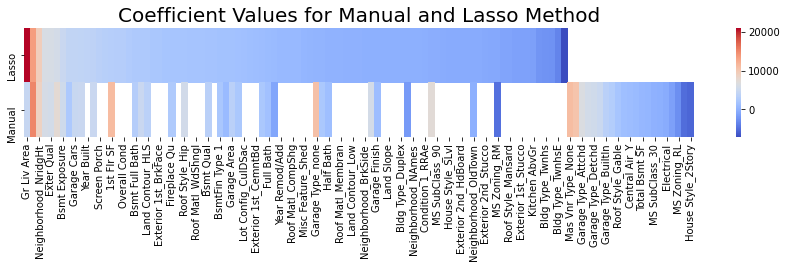

In [12]:
combined_results2 = combined_results.rename(columns = {'man_coef_val': 'Manual', 'las_coef_val': 'Lasso'})
plt.figure(figsize=(15,2))

plt.title('Coefficient Values for Manual and Lasso Method', fontsize = 20)

sns.heatmap(combined_results2.T,
           annot=False,
           cmap = 'coolwarm');


In [217]:
combined_results_no_nas = combined_results.dropna()

In [218]:
len(combined_results_no_nas)

34

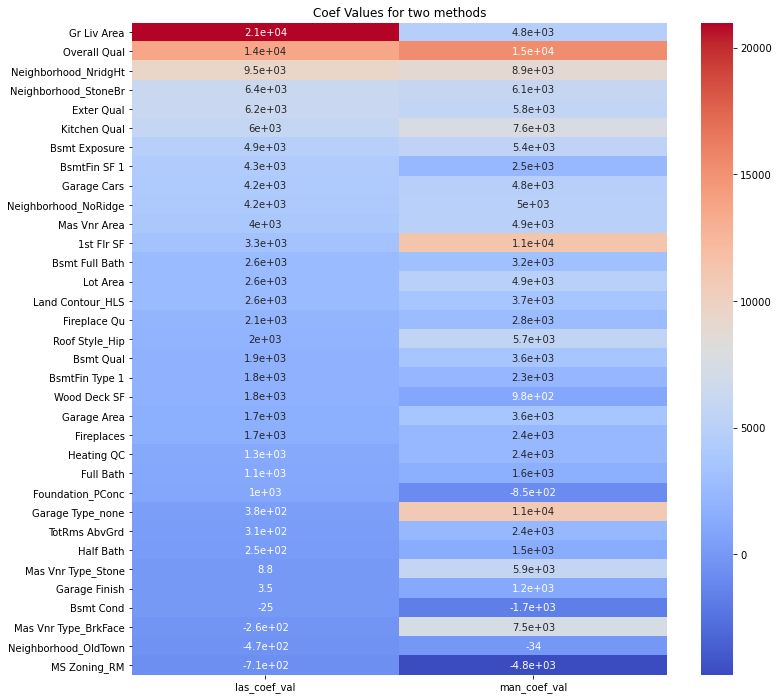

In [219]:
plt.figure(figsize=(12,12))

plt.title('Coef Values for two methods')

sns.heatmap(combined_results_no_nas,
           annot=True,
           cmap = 'coolwarm');

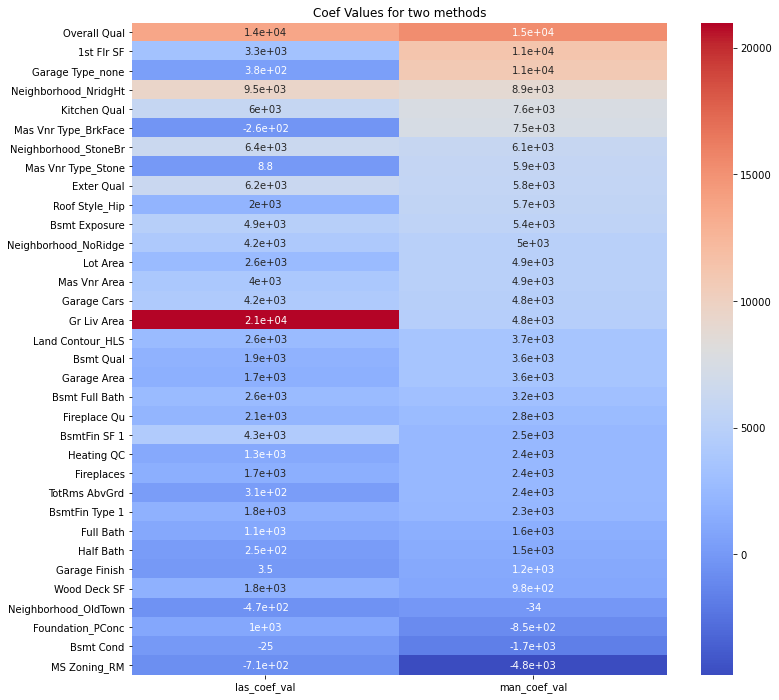

In [220]:
plt.figure(figsize=(12,12))

plt.title('Coef Values for two methods')

sns.heatmap(combined_results_no_nas.sort_values('man_coef_val', ascending = False),
           annot=True,
           cmap = 'coolwarm');

In [221]:
combined_results_no_nas['man_ord'] = list(range(1,35)).copy()

<ipython-input-221-d57f1b27ef2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_results_no_nas['man_ord'] = list(range(1,35)).copy()


In [222]:
combined_results_man_ord = combined_results_no_nas.sort_values('man_coef_val', ascending=False).copy()

In [226]:
combined_results_man_ord = combined_results_man_ord.sort_values('las_coef_val', ascending=False).copy()

In [229]:
combined_results_man_ord.head()

,las_coef_val,man_coef_val,man_ord,las_ord
Gr Liv Area,20996.217885,4751.936837,16,1
Overall Qual,13686.671018,15262.720302,1,2
Neighborhood_NridgHt,9452.750353,8859.031625,4,3
Neighborhood_StoneBr,6360.891369,6089.427070,7,4
Exter Qual,6212.077268,5761.887597,9,5


In [230]:
combined_results_man_ord['las_ord'] = list(range(1,35)).copy()

In [231]:
combined_results_man_ord.head()

,las_coef_val,man_coef_val,man_ord,las_ord
Gr Liv Area,20996.217885,4751.936837,16,1
Overall Qual,13686.671018,15262.720302,1,2
Neighborhood_NridgHt,9452.750353,8859.031625,4,3
Neighborhood_StoneBr,6360.891369,6089.427070,7,4
Exter Qual,6212.077268,5761.887597,9,5


In [242]:
combined_results_man_ord = combined_results_man_ord.sort_values('man_coef_val', ascending=False).copy()

In [243]:
combined_results_man_ord['diff_ord']= combined_results_man_ord['man_ord']- combined_results_man_ord['las_ord']

In [244]:
combined_results_man_ord[['diff_ord']].sort_values('diff_ord')

,diff_ord
Mas Vnr Type_BrkFace,-26
Garage Type_none,-23
Mas Vnr Type_Stone,-21
1st Flr SF,-10
Roof Style_Hip,-7
Neighborhood_OldTown,-2
TotRms AbvGrd,-2
Garage Area,-2
Overall Qual,-1
Kitchen Qual,-1


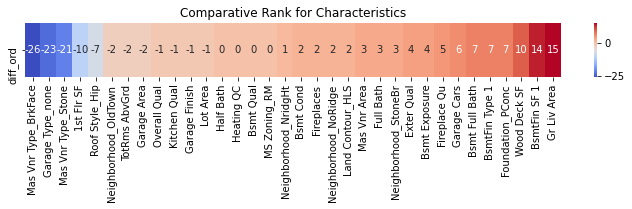

In [245]:
plt.figure(figsize=(12,1))

plt.title('Comparative Rank for Characteristics')

sns.heatmap(combined_results_man_ord[['diff_ord']].sort_values('diff_ord').T,
           annot=True,
           cmap = 'coolwarm');

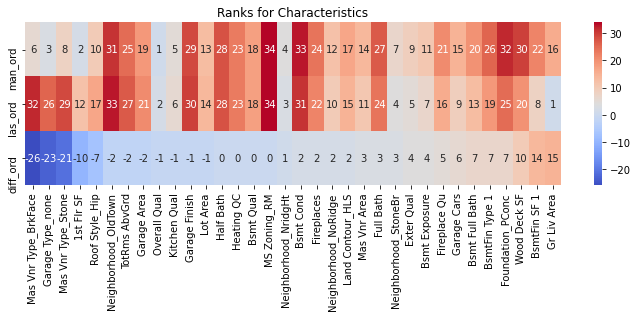

In [246]:
plt.figure(figsize=(12,3))

plt.title('Ranks for Characteristics')

sns.heatmap(combined_results_man_ord[['man_ord','las_ord','diff_ord']].sort_values('diff_ord').T,
           annot=True,
           cmap = 'coolwarm');

In [247]:
combined_filtered = combined_results_man_ord[combined_results_man_ord['diff_ord'] < 10][combined_results_man_ord['diff_ord'] > -10]

<ipython-input-247-8c4f27d6c13b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  combined_filtered = combined_results_man_ord[combined_results_man_ord['diff_ord'] < 10][combined_results_man_ord['diff_ord'] > -10]


In [248]:
combined_filtered.index[0:10]

Index(['Overall Qual', 'Neighborhood_NridgHt', 'Kitchen Qual',
       'Neighborhood_StoneBr', 'Exter Qual', 'Roof Style_Hip', 'Bsmt Exposure',
       'Neighborhood_NoRidge', 'Lot Area', 'Mas Vnr Area'],
      dtype='object')

In [249]:
combined_filtered[['las_ord','man_ord','diff_ord']].head()

,las_ord,man_ord,diff_ord
Overall Qual,2,1,-1
Neighborhood_NridgHt,3,4,1
Kitchen Qual,6,5,-1
Neighborhood_StoneBr,4,7,3
Exter Qual,5,9,4


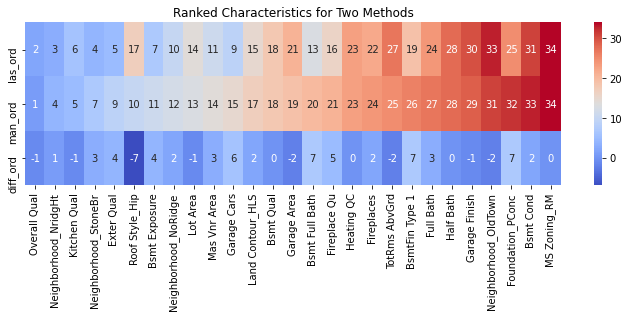

In [250]:
plt.figure(figsize=(12,3))

plt.title('Ranked Characteristics for Two Methods')

sns.heatmap(combined_filtered[['las_ord','man_ord','diff_ord']].T,
           annot=True,
           cmap = 'coolwarm');

In [251]:
combined_filtered.loc[combined_filtered.index[0:10]][['las_ord','man_ord','diff_ord']]

,las_ord,man_ord,diff_ord
Overall Qual,2,1,-1
Neighborhood_NridgHt,3,4,1
Kitchen Qual,6,5,-1
Neighborhood_StoneBr,4,7,3
Exter Qual,5,9,4
Roof Style_Hip,17,10,-7
Bsmt Exposure,7,11,4
Neighborhood_NoRidge,10,12,2
Lot Area,14,13,-1
Mas Vnr Area,11,14,3


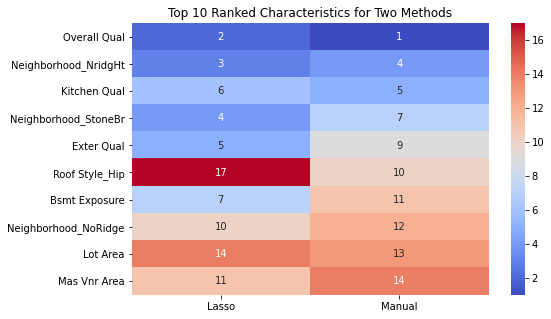

In [252]:
plt.figure(figsize=(8,5))

plt.title('Top 10 Ranked Characteristics for Two Methods')

combined_filtered2 = combined_filtered.rename(columns = {'man_ord': 'Manual', 'las_ord': 'Lasso'})

sns.heatmap(combined_filtered2.loc[combined_filtered.index[0:10]][['Lasso','Manual']],
           annot=True,
           cmap = 'coolwarm');

** The features in the above heatmap are the features that a developer should focus on for a house.**

# Notebook Summary:

In this notebook, I use my cleaned training data as well as the lasso model on all features from Step 6 and the linear regression model on manually selected features from Step 7 to compare the results of the lasso model and linear regression model.

I compare the features for each model, then select the ones that appear in both models for further analysis.  I think create a rank for each feature based on the regression score and lasso score, and I also compare the differences between the ranks for each model.  I select features that only have a rank diffence of less than 10, and from these, I choose the ones with the highest rank relative to manual area since I trust the manual features selection for the r2 correlations.

** These are the features that a developer should focus on for a house.**